In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import datasets, ensemble

In [2]:
import random
import math
import statistics
random.seed(1)

from numpy import array
from sklearn.model_selection import KFold
from statistics import mean


In [3]:
data=pd.read_csv('fish.csv')

In [4]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,Bream
1,290.0,24.0,26.3,31.2,12.4800,4.3056,Bream
2,340.0,23.9,26.5,31.1,12.3778,4.6961,Bream
3,363.0,26.3,29.0,33.5,12.7300,4.4555,Bream
4,430.0,26.5,29.0,34.0,12.4440,5.1340,Bream


In [5]:
data["Species"] = data["Species"].astype('category')
data["Species"] = data["Species"].cat.codes

In [6]:
# separate the features and the target variable
X = data.iloc[:, 1:] # select all columns except the first one as features
y = data.iloc[:, 0] # select the first column as the target variable

# calculate the correlation matrix
corr_matrix = X.corrwith(y)

# sort the features by correlation with the target variable
sorted_features = corr_matrix.abs().sort_values(ascending=False)

# select the top k features
k = 5 # set the number of top features to select
selected_features = sorted_features[:k].index.tolist()

# create a new dataframe with the selected features and the target variable
df = data[[y.name] + selected_features]

# separate the selected features and the target variable
X = df.iloc[:, 1:] # select all columns except the first one as features
y = df.iloc[:, 0] # select the first column as the target variable

In [7]:
X

,Length3,Length2,Length1,Width,Height
0,30.0,25.4,23.2,4.0200,11.5200
1,31.2,26.3,24.0,4.3056,12.4800
2,31.1,26.5,23.9,4.6961,12.3778
3,33.5,29.0,26.3,4.4555,12.7300
4,34.0,29.0,26.5,5.1340,12.4440
...,...,...,...,...,...
154,13.4,12.2,11.5,1.3936,2.0904
155,13.5,12.4,11.7,1.2690,2.4300
156,13.8,13.0,12.1,1.2558,2.2770
157,15.2,14.3,13.2,2.0672,2.8728


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)


In [9]:
ranf = RandomForestRegressor(random_state=0)
rf= ranf.fit(X_train,y_train)
scores_rf= cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores_rf
print(np.mean(scores_rf))

y_pred_rf = cross_val_predict(ranf, X_test,y_test)
scores_test_rf= cross_val_score(ranf, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_rf))

-5653.02304819423
-19076.77691173334


In [10]:
#Decision Tree
dectree = DecisionTreeRegressor(random_state = 0)
dt= dectree.fit(X_train,y_train)
scores_dt= cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(np.mean(scores_dt))

y_pred_dt = cross_val_predict(dectree, X_test,y_test)
scores_test_dt= cross_val_score(dectree, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_dt))

-10476.197294871796
-21136.96433333333


In [11]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test,y_test)
scores_test_knn= cross_val_score(knn_model, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_knn))

-37812.796506666666


In [12]:
data.tail()

,Weight,Length1,Length2,Length3,Height,Width,Species
154,12.2,11.5,12.2,13.4,2.0904,1.3936,5
155,13.4,11.7,12.4,13.5,2.4300,1.2690,5
156,12.2,12.1,13.0,13.8,2.2770,1.2558,5
157,19.7,13.2,14.3,15.2,2.8728,2.0672,5
158,19.9,13.8,15.0,16.2,2.9322,1.8792,5


In [13]:
X

,Length3,Length2,Length1,Width,Height
0,30.0,25.4,23.2,4.0200,11.5200
1,31.2,26.3,24.0,4.3056,12.4800
2,31.1,26.5,23.9,4.6961,12.3778
3,33.5,29.0,26.3,4.4555,12.7300
4,34.0,29.0,26.5,5.1340,12.4440
...,...,...,...,...,...
154,13.4,12.2,11.5,1.3936,2.0904
155,13.5,12.4,11.7,1.2690,2.4300
156,13.8,13.0,12.1,1.2558,2.2770
157,15.2,14.3,13.2,2.0672,2.8728


In [14]:
X['Width'] = pd.qcut(X['Width'], q=5, labels=range(1, 6), duplicates='drop')


<ipython-input-14-09f09ae96ca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Width'] = pd.qcut(X['Width'], q=5, labels=range(1, 6), duplicates='drop')


In [15]:
X['Length1'] = pd.qcut(X['Length1'], q=5, labels=range(1, 6), duplicates='drop')


<ipython-input-15-2cc05e7e85db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Length1'] = pd.qcut(X['Length1'], q=5, labels=range(1, 6), duplicates='drop')


In [16]:
X['Length2'] = pd.qcut(X['Length2'], q=5, labels=range(1, 6), duplicates='drop')

<ipython-input-16-8a7f9e0cfb79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Length2'] = pd.qcut(X['Length2'], q=5, labels=range(1, 6), duplicates='drop')


In [17]:
X['Length3'] = pd.qcut(X['Length3'], q=5, labels=range(1, 6), duplicates='drop')

<ipython-input-17-8204bd19fae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Length3'] = pd.qcut(X['Length3'], q=5, labels=range(1, 6), duplicates='drop')


In [18]:
X['Height'] = pd.qcut(X['Height'], q=5, labels=range(1, 6), duplicates='drop')

<ipython-input-18-f87c5f6da85a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Height'] = pd.qcut(X['Height'], q=5, labels=range(1, 6), duplicates='drop')


In [19]:
X

,Length3,Length2,Length1,Width,Height
0,3,3,3,3,4
1,3,3,3,3,4
2,3,3,3,3,4
3,3,3,3,3,5
4,3,3,3,4,4
...,...,...,...,...,...
154,1,1,1,1,1
155,1,1,1,1,1
156,1,1,1,1,1
157,1,1,1,1,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)


In [21]:
def add_mean_columns(X_train, X_test, y_train):
    
    # Iterate over each column in X_train
    for column in X_train.columns:

        # Skip mean columns
        #if column.endswith('_mean'):
           # continue

        # Find the unique values in the column
        unique_values = X_train[column].unique()

        # Calculate the mean for each unique value using y_train
        means = {}
        for value in unique_values:
            means[value] = y_train[X_train[column] == value].mean()

        # Replace the column in X_train with the corresponding means
        X_train[column] = X_train[column].apply(lambda x: means[x])

        # Replace the column in X_test with the corresponding means
        X_test[column] = X_test[column].apply(lambda x: means[x] if x in means else x)

        # Check for unique values in X_test that are not in X_train
        missing_values = set(X_test[column].unique()) - set(X_train[column].unique())
        if missing_values:
            print(f"Warning: Unique values {missing_values} in {column} of X_test not found in X_train.")

    return X_train, X_test

In [22]:
X_train_new, X_test_new = add_mean_columns(X_train, X_test, y_train)

<ipython-input-21-1cda3ae5e109>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = X_train[column].apply(lambda x: means[x])
<ipython-input-21-1cda3ae5e109>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = X_test[column].apply(lambda x: means[x] if x in means else x)


In [23]:
X_test = X_test_new
X_train = X_train_new

In [24]:
X_test

,Length3,Length2,Length1,Width,Height
7,301.785714,318.931034,308.586207,289.846154,674.500000
40,148.608696,149.130435,145.833333,144.416667,197.869565
95,148.608696,149.130435,145.833333,144.416667,197.869565
45,148.608696,149.130435,145.833333,144.416667,363.923077
110,575.000000,636.000000,630.333333,924.347826,643.500000
120,889.833333,850.739130,850.739130,924.347826,643.500000
59,575.000000,636.000000,630.333333,924.347826,643.500000
131,575.000000,850.739130,850.739130,289.846154,197.869565
33,889.833333,850.739130,850.739130,924.347826,674.500000
83,148.608696,149.130435,145.833333,144.416667,197.869565


In [25]:
def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)

kappa = 1.000, avg MSE = 65046.411
kappa = 2.000, avg MSE = 27278.280
kappa = 3.000, avg MSE = 19225.447
kappa = 4.000, avg MSE = 21118.855
kappa = 5.000, avg MSE = 23633.493
kappa = 6.000, avg MSE = 25188.756
kappa = 7.000, avg MSE = 26068.303
kappa = 8.000, avg MSE = 26565.641
kappa = 9.000, avg MSE = 26830.301


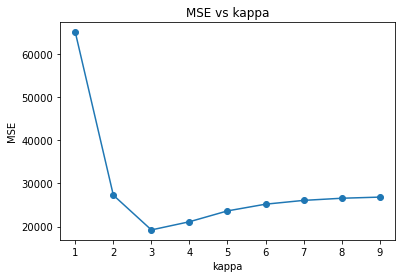

In [26]:
kf = KFold(n_splits=10)
kappa_values = np.array([1,2,3,4,5,6,7,8,9])
mse_values = []

for kappa in kappa_values:
    mse = 0.0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        y_pred = prop_reg(X_test, X_train, y_train, y_test, kappa)
        mse += mean_squared_error(y_test, y_pred)
    mse /= kf.get_n_splits(X)
    mse_values.append(mse)
    print(f"kappa = {kappa:.3f}, avg MSE = {mse:.3f}")

# plot the MSE vs kappa curve
plt.plot(kappa_values, mse_values, '-o')
plt.xlabel('kappa')
plt.ylabel('MSE')
plt.title('MSE vs kappa')
plt.show()

In [27]:
# find the index of the minimum MSE value
min_index = np.argmin(mse_values)

# print the minimum MSE value and the corresponding kappa value
print(f"Minimum MSE: {mse_values[min_index]:.3f}, Kappa value: {kappa_values[min_index]}")

Minimum MSE: 19225.447, Kappa value: 3


Text(0.5, -0.4, 'Bar Graph showing the MSE for different algorithms')

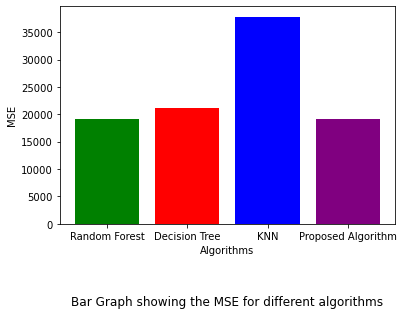

In [28]:
values = [19076.78,21136.96,37812.8,19225.47]
labels = ['Random Forest', 'Decision Tree', 'KNN','Proposed Algorithm']
fig, ax = plt.subplots()
ax.bar(labels, values, color=['green','red','blue','purple'])

# add labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('MSE')
ax.set_title('Bar Graph showing the MSE for different algorithms', loc='center', y=-0.4)